In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm, skew 

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #限制浮点数保留3位小数

In [2]:
df = pd.read_csv('wine-reviews/winemag-data-130k-v2.csv') # 对youtube数据集中的USvidoes进行读取
df.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,nan,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


# 数据摘要

标称属性

In [3]:
cols = ['country', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'variety', 'winery' ]  # 标称属性列表
for col in cols:
    print(df[col].value_counts())
    print('-' * 50)

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Czech Re

数值属性

In [4]:
cols = ['points', 'price']  # 数值属性列表
for col in cols:
    print(col)
    print("max:"+str(df[col].max()))
    print("min:"+str(df[col].min()))
    print("mean:"+str(df[col].mean()))
    print("median:"+str(df[col].median()))
    print("Q1:"+str(df[col].quantile(.25)))
    print("Q2:"+str(df[col].quantile(.5)))
    print("Q3:"+str(df[col].quantile(.75)))
    print("default_num:"+str(df[col].isnull().sum()))
    print('-' * 50)
  


points
max:100
min:80
mean:88.44713820775404
median:88.0
Q1:86.0
Q2:88.0
Q3:91.0
default_num:0
--------------------------------------------------
price
max:3300.0
min:4.0
mean:35.363389129985535
median:25.0
Q1:17.0
Q2:25.0
Q3:42.0
default_num:8996
--------------------------------------------------


# 数据的可视化

points的直方图和盒图

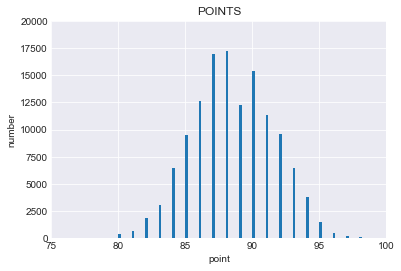

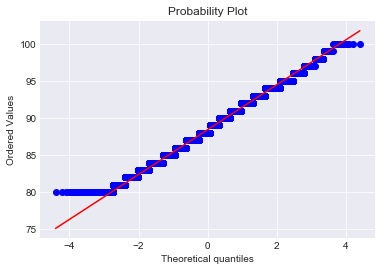

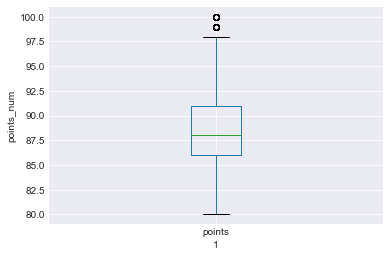

In [38]:
#row_num = df.iloc[:,0].size
#print(row_num) 

# 直方图
def draw_hist(myList,Title,Xlabel,Ylabel,Xmin,Xmax,Ymin,Ymax,bin_num):
      plt.hist(myList,bin_num) # 1000段
      plt.xlabel(Xlabel)
      plt.xlim(Xmin,Xmax)
      plt.ylabel(Ylabel)
      plt.ylim(Ymin,Ymax)
      plt.title(Title)
      plt.show()
draw_hist(df['points'], 'POINTS', 'point', 'number', 75, 100, 0, 20000,100 )

#Q-Q图
fig = plt.figure()
res = stats.probplot(df['points'], dist="norm", plot=plt)
plt.show()

# 盒图
df.boxplot(column=['points'])  
plt.ylabel("points_num")
plt.xlabel("1")  # 我们设置横纵坐标的标题。
plt.show()


points服从正态分布

price的直方图和盒图

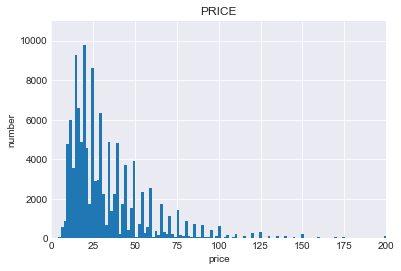

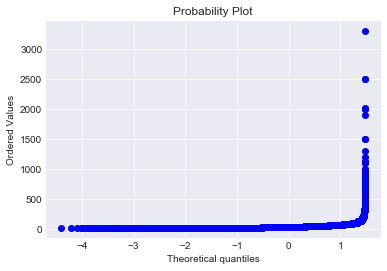

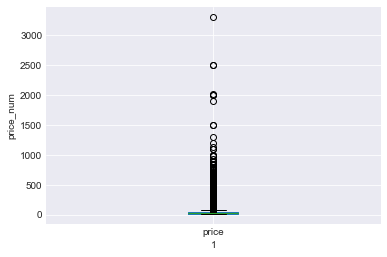

In [75]:
## 直方图

df_2 = df['price']
price = df_2.dropna(axis=0)


draw_hist(price, 'PRICE', 'price', 'number', 0, 200, 0, 11000.000, 2000)

#Q-Q图
fig = plt.figure()
res = stats.probplot(df['price'], dist="norm", plot=plt)
plt.show()

# 盒图
df.boxplot(column=['price'])  
plt.ylabel("price_num")
plt.xlabel("1")  # 我们设置横纵坐标的标题。
plt.show()

plt.close()

In [ ]:
price不服从正态分布

由直方图和QQ图可知，points服从正态分布，price不服从正太分布

# 数据缺失处理

In [76]:
df.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [ ]:
将缺失部分剔除

In [78]:
df_2 = df
df_2 = df_2.dropna(axis = 0)
df_2.isnull().sum()

Unnamed: 0               0
country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
dtype: int64

In [ ]:
用最高频率值来填补缺失值

In [79]:
df_3 = df
df_3['country'] = df_3['country'].fillna('US') # 频率最高
df_3['designation'] = df_3['designation'].fillna('Reserve')  # 频率最高
df_3['price'] = df_3['price'].fillna(25.00)   # 从直方图看分布最多
df_3['province'] = df_3['province'].fillna('California')
df_3['region_1'] = df_3['region_1'].fillna('Napa Valley')
df_3['region_2'] = df_3['region_2'].fillna('Central Coast')
df_3['taster_name'] = df_3['taster_name'].fillna('Roger Voss')
df_3['taster_twitter_handle'] = df_3['taster_twitter_handle'].fillna('@vossroger')
df_3.isnull().sum()



Unnamed: 0               0
country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  1
winery                   0
dtype: int64

此时数据集已没有缺失数据